# KG Generator Tool

## Let's get started by importing relevant libraries

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

import pybel
from pybel.io.jupyter import to_jupyter
from utils import *
from kg_gen import *

from IPython.display import Markdown, display

## Please execute following cells

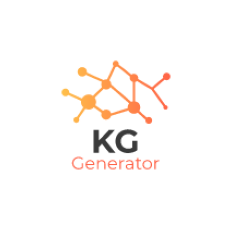

<span style='color:blue'>**Welcome to the KG Generator tool. In the following steps, we will need a couple of inputs from your side.**</span>

Please enter the disease you are interested in and we will try to find the best matches for you.

Input: dasfjkdlf
Ooops!! Did you have a typo in the name. Please try again!


<span style='color:blue'>**Welcome to the KG Generator tool. In the following steps, we will need a couple of inputs from your side.**</span>

Please enter the disease you are interested in and we will try to find the best matches for you.

Input: influenza


index,id,name
0,EFO_0007328,influenza
1,EFO_0005226,swine influenza
2,EFO_1001488,influenza A (H1N1)
3,EFO_1000955,Haemophilus influenzae meningitis
4,EFO_0005222,avian influenza
5,MONDO_0033542,immunodeficiency 70
6,MONDO_0024352,viral respiratory tract infection
7,EFO_0007214,common cold
8,EFO_0007227,croup
9,EFO_1001272,bacterial pneumonia


<span style='color:None'>**Here you go! Hopefully your disease of interest is in the list. If so, let's get started.**</span>

Please enter the index value of your disease of interest. Input: 0


Please enter the clinical trial phase of chemicals which should be identified by the workflow. Use a number between 1 (early phase) and 4 (FDA approved). For example, if you use 3, the KG will fetch chemicals that are in phase 3. Also, remember that lower the input value, higher will be the number of identified chemicals and therefore the running time of workflow also increases.


Your desired clinical trial phase: 4


Please provide a name for you KG. Input: Influenza_Test


We have identified 2137 proteins (Swiss-Prot) associated with the disease. Following is a histogram that shows distribution of proteins based on scores provided by OpenTargets. The scores are influenced by various factors such as genetic associations, expression, mutations, known pathways, targeting drugs and so on.

Displaying top 20 genes


Protein,ENSG,UniProt,Source,Score
GRIN2C,ENSG00000161509,Q14957,uniprot_swissprot,0.602284
GRIN3B,ENSG00000116032,O60391,uniprot_swissprot,0.602284
GRIN2D,ENSG00000105464,O15399,uniprot_swissprot,0.602284
GRIN2A,ENSG00000183454,Q12879,uniprot_swissprot,0.602284
GRIN1,ENSG00000176884,Q05586,uniprot_swissprot,0.602284
GRIN2B,ENSG00000273079,Q13224,uniprot_swissprot,0.602284
GRIN3A,ENSG00000198785,Q8TCU5,uniprot_swissprot,0.602284
PTGS2,ENSG00000073756,P35354,uniprot_swissprot,0.575402
PTGS1,ENSG00000095303,P23219,uniprot_swissprot,0.567783
KPNA1,ENSG00000114030,P52294,uniprot_swissprot,0.551187


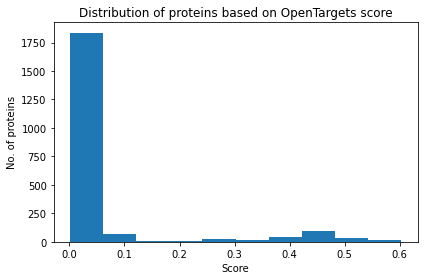



We recommend taking a threshold above 0.3 to exclude loosely associated proteins. 
Please enter your desired threshold: 0.5


Alright, we are good to go now. Your KG is now being generated! Sit back and relax!!

 Total no. of proteins:  43

     Protein             ENSG UniProt             Source     Score
0    GRIN2C  ENSG00000161509  Q14957  uniprot_swissprot  0.602284
1    GRIN3B  ENSG00000116032  O60391  uniprot_swissprot  0.602284
2    GRIN2D  ENSG00000105464  O15399  uniprot_swissprot  0.602284
3    GRIN2A  ENSG00000183454  Q12879  uniprot_swissprot  0.602284
4     GRIN1  ENSG00000176884  Q05586  uniprot_swissprot  0.602284
5    GRIN2B  ENSG00000273079  Q13224  uniprot_swissprot  0.602284
6    GRIN3A  ENSG00000198785  Q8TCU5  uniprot_swissprot  0.602284
7     PTGS2  ENSG00000073756  P35354  uniprot_swissprot  0.575402
8     PTGS1  ENSG00000095303  P23219  uniprot_swissprot  0.567783
9     KPNA1  ENSG00000114030  P52294  uniprot_swissprot  0.551187
10     FAAH  ENSG00000117480  

Fetching Protein-related info:   0%|          | 0/43 [00:00<?, ?it/s]

A total of 9 drugs have been identified. Now fetching relevant data


Retrieving mechanisms from ChEMBL:   0%|          | 0/9 [00:00<?, ?it/s]

Retrieving bioassays from ChEMBL:   0%|          | 0/9 [00:00<?, ?it/s]

Filtering UniProt proteins from ChEMBL:   0%|          | 0/24 [00:00<?, ?it/s]

Filtering human proteins from ChEMBL:   0%|          | 0/24 [00:00<?, ?it/s]

Populating ChEMBL data for human proteins:   0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

Populating Chemical-MoA edges:   0%|          | 0/6 [00:00<?, ?it/s]

Adding bioassay edges to BEL:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving Adverse Effects for each drug:   0%|          | 0/9 [00:00<?, ?it/s]

Your KG is now generated!


In [2]:
kg = createKG()

In [3]:
kg.summarize

Name,Influenza_Test
Version,0.0.1
Nodes,713
Namespaces,8
Edges,2173
Annotations,0
Citations,3
Authors,0
Components,1
Warnings,0
Network Density,0.00428


In [4]:
to_jupyter(kg)

<IPython.core.display.Javascript object>

In [ ]:
KG_namespace_plot(kg)

In [241]:
def GetQuery():
    
    query = input('Please enter the disease you are interested in and we will try to find the best matches for you.' +'\n' + '\n' + 'Input: ')
    return(query)

In [285]:
def GetViralProteins():
    
    # file downloaded from https://www.genome.jp/ftp/db/virushostdb Dated: 12/09/2023
    virus = pd.read_csv('data/virushostdb.tsv',sep='\t')
    
    cols = ['virus tax id','virus name','DISEASE','host tax id']
    virus = virus[cols]
    
    #print(virus)

    #filter virus with host humans 
    virus = virus.loc[virus['host tax id'] == 9606.0,:]
    virus = virus.reset_index(drop=True)
    
    #replace 9606.0 to 9606
    virus["host tax id"] = pd.to_numeric(virus["host tax id"], downcast='integer')
    
    #get the initial keyword for disease search
    disease = GetQuery()
    
    #subset df with disease keyword
    virus_subset_1 = virus[virus['DISEASE'].str.contains(disease,na=False,case=False)]
    
    virus_name = input('Enter the name of virus or skip it by typing \'no\': ')
    
    #subset df with virus name
    if virus_name != 'no' or virus_name != 'NO' or virus_name != 'No':
        
        virus_subset_2 = virus[virus['virus name'].str.contains(disease,na=False,case=False)]
    
    #merge subsets of df_1 and df_2
    virus_subset_merge = pd.concat([virus_subset_1,virus_subset_2])
    
    virus_subset_merge = virus_subset_merge.drop_duplicates(keep='first')
    
    virus_subset_merge = virus_subset_merge.reset_index(drop=True)
    
    virus_subset_merge['index'] = virus_subset_merge.index
    
    virus_subset_merge.style.hide(axis='index')  
    
    virus_subset_merge = virus_subset_merge[['index','virus tax id','virus name','DISEASE','host tax id']]
    display(HTML(virus_subset_merge.to_html(index=False)))
    
    temp_id = input('Enter the index value (if multiple, use space, for example -> 0 1 3): ')
    
    temp_id = temp_id.split(' ')
    temp_id = [int(x) for x in temp_id]
    print(virus_subset_merge.loc[0]['virus tax id'])

    return(temp_id)
    

In [286]:
test = GetViralProteins()

Please enter the disease you are interested in and we will try to find the best matches for you.

Input: aids
Enter the name of virus or skip it by typing 'no': no


index,virus tax id,virus name,DISEASE,host tax id
0,11676,Human immunodeficiency virus 1,"Acquired immunodeficiency syndrome (AIDS), HIV infection",9606
1,11709,Human immunodeficiency virus 2,"Acquired immunodeficiency syndrome (AIDS), HIV infection",9606


Enter the index value (if multiple, use space, i.e. 0 1 3): 0
11676


In [282]:
test

[0, 1]

In [233]:
x = pd.concat([x,y])

In [235]:
x = x.drop_duplicates(keep='first')

In [236]:
x

,virus tax id,virus name,virus lineage,refseq id,KEGG GENOME,KEGG DISEASE,DISEASE,host tax id,host name,host lineage,pmid,evidence,sample type,source organism
1416,64320,Zika virus,Viruses; Riboviria; Orthornavirae; Kitrinoviri...,"NC_012532, NC_035889",T40049,H01553,Zika fever; Zika virus disease,9606,Homo sapiens,Eukaryota; Opisthokonta; Metazoa; Eumetazoa; B...,27174284,"Literature, RefSeq, UniProt",NaN,NaN


In [ ]:
lines[2]

In [215]:
virus = pd.read_csv('data/virushostdb.tsv',sep='\t')

In [216]:
df = virus.loc[virus['host tax id'] == 9606.0,:]

In [217]:
#df.to_csv('data/virus_host.csv',sep=',')

In [218]:
df = df.reset_index(drop=True)

In [219]:
df["host tax id"] = pd.to_numeric(df["host tax id"], downcast='integer')

In [229]:
df

,virus tax id,virus name,virus lineage,refseq id,KEGG GENOME,KEGG DISEASE,DISEASE,host tax id,host name,host lineage,pmid,evidence,sample type,source organism
0,46350,Adeno-associated virus - 3,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,NC_001729,NaN,NaN,NaN,9606,Homo sapiens,Eukaryota; Opisthokonta; Metazoa; Eumetazoa; B...,8661429,Literature,NaN,NaN
1,57579,Adeno-associated virus - 4,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,NC_001829,NaN,NaN,NaN,9606,Homo sapiens,Eukaryota; Opisthokonta; Metazoa; Eumetazoa; B...,16557905,Literature,NaN,NaN
2,68558,Adeno-associated virus - 6,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,AF028704,NaN,NaN,NaN,9606,Homo sapiens,Eukaryota; Opisthokonta; Metazoa; Eumetazoa; B...,9420229,Literature,NaN,NaN
3,10804,adeno-associated virus 2,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,NC_001401,NaN,NaN,NaN,9606,Homo sapiens,Eukaryota; Opisthokonta; Metazoa; Eumetazoa; B...,25127256,Literature,NaN,NaN
4,68742,Adeno-associated virus 3B,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,AF028705,NaN,NaN,NaN,9606,Homo sapiens,Eukaryota; Opisthokonta; Metazoa; Eumetazoa; B...,9420229,Literature,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,2825847,Yezo virus,Viruses; Riboviria; Orthornavirae; Negarnaviri...,"NC_079098, NC_079099, NC_079100",NaN,NaN,NaN,9606,Homo sapiens,Eukaryota; Opisthokonta; Metazoa; Eumetazoa; B...,NaN,RefSeq,NaN,NaN
1413,2053026,Yichang virus,Viruses; Riboviria; Orthornavirae; Pisuviricot...,NC_040534,NaN,NaN,NaN,9606,Homo sapiens,Eukaryota; Opisthokonta; Metazoa; Eumetazoa; B...,28823942,Literature,NaN,NaN
1414,186538,Zaire ebolavirus,Viruses; Riboviria; Orthornavirae; Negarnaviri...,NC_002549,T40012,H00283,Ebola disease; Ebola hemorrhagic fever,9606,Homo sapiens,Eukaryota; Opisthokonta; Metazoa; Eumetazoa; B...,NaN,UniProt,NaN,NaN
1415,1764086,Zerdali virus,Viruses; Riboviria; Orthornavirae; Negarnaviri...,NC_037613,NaN,NaN,NaN,9606,Homo sapiens,Eukaryota; Opisthokonta; Metazoa; Eumetazoa; B...,27007326,Literature,NaN,NaN


In [231]:
x = df[df['DISEASE'].str.contains("zika",na=False,case=False)]

In [232]:
y = df[df['virus name'].str.contains("zika",na=False,case=False)]

In [130]:
test = requests.get('https://rest.uniprot.org/uniprotkb/stream?fields=accession%2Creviewed%2Cid%2Cgene_names%2Corganism_name%2Cgene_primary%2Cprotein_name%2Clength&format=tsv&query=%28%28taxonomy_id:10244%29%29+AND+%28reviewed%3Atrue%29')

In [135]:
query_uniprot = requests.get('https://rest.uniprot.org/uniprotkb/stream?fields=accession%2Creviewed%2Cid%2Cgene_names%2Corganism_name%2Clength%2Cgene_primary%2Cprotein_name&format=tsv&query=%28%28taxonomy_id:10244%29+AND+%28reviewed%3Atrue%29%29')

In [136]:
test = test.text.split('\n')

In [137]:
test

['Entry\tReviewed\tEntry Name\tGene Names\tOrganism\tLength\tGene Names (primary)\tProtein names',
 "A0A7H0DN85\treviewed\tMCEL_MONPV\tOPG113 MPXVgp098\tMonkeypox virus\t845\tOPG113\tmRNA-capping enzyme catalytic subunit (Virus termination factor large subunit) (VTF large subunit) (mRNA-capping enzyme 97 kDa subunit) (mRNA-capping enzyme D1 subunit) (mRNA-capping enzyme large subunit) [Includes: Polynucleotide 5'-triphosphatase (EC 3.1.3.33) (mRNA 5'-triphosphatase) (TPase); mRNA guanylyltransferase (EC 2.7.7.50) (GTP--RNA guanylyltransferase) (GTase); mRNA (guanine-N(7))-methyltransferase (EC 2.1.1.56) (mRNA cap methyltransferase)]",
 'A0A7H0DNB6\treviewed\tPG144_MONPV\tOPG144 MPXVgp128\tMonkeypox virus\t204\tOPG144\tVirion membrane protein OPG144 precursor [Cleaved into: Mature 21 kDa protein OPG144]',
 'A0A7H0DMZ6\treviewed\tVGF_MONPV\tOPG019 MPXVgp006\tMonkeypox virus\t142\tOPG019\tPro-Viral epidermal growth factor (Pro-VGF) [Cleaved into: Viral epidermal growth factor (VGF) (Secre

In [138]:
df = pd.DataFrame([x.strip().split('\t') for x in test])

In [141]:
cols = df.iloc[0]
df = df[1:len(df)-1]
df.columns = cols

In [142]:
df

,Entry,Reviewed,Entry Name,Gene Names,Organism,Length,Gene Names (primary),Protein names
1,A0A7H0DN85,reviewed,MCEL_MONPV,OPG113 MPXVgp098,Monkeypox virus,845,OPG113,mRNA-capping enzyme catalytic subunit (Virus t...
2,A0A7H0DNB6,reviewed,PG144_MONPV,OPG144 MPXVgp128,Monkeypox virus,204,OPG144,Virion membrane protein OPG144 precursor [Clea...
3,A0A7H0DMZ6,reviewed,VGF_MONPV,OPG019 MPXVgp006,Monkeypox virus,142,OPG019,Pro-Viral epidermal growth factor (Pro-VGF) [C...
4,A0A7H0DMZ7,reviewed,PG021_MONPV,OPG021 MPXVgp008,Monkeypox virus,242,OPG021,host range factor p28 (EC 2.3.2.27) (E3 ubiqui...
5,A0A7H0DN21,reviewed,RIR2_MONPV,OPG048 MPXV-M5312_HM12_Rivers-032,Monkeypox virus,319,OPG048,Ribonucleoside-diphosphate reductase small cha...
...,...,...,...,...,...,...,...,...
176,A0A7H0DNG9,reviewed,PG015_MONPV,OPG015 MPXVgp004,Monkeypox virus,437,OPG015,Ankyrin repeat domain-containing protein OPG015
177,M1L9M3,reviewed,PG087_MONPV,OPG087 MPXVgp072,Monkeypox virus,220,OPG087,Late transcription elongation factor OPG087
178,Q8V4T7,reviewed,PROF_MONPZ,OPG171 A42R,Monkeypox virus (strain Zaire-96-I-16) (MPX),133,OPG171,Profilin
179,Q8V4V4,reviewed,VTF3L_MONPZ,VITF3L A24R,Monkeypox virus (strain Zaire-96-I-16) (MPX),382,VITF3L,Intermediate transcription factor 3 large subu...


In [144]:
list(df['Entry'])

['A0A7H0DN85',
 'A0A7H0DNB6',
 'A0A7H0DMZ6',
 'A0A7H0DMZ7',
 'A0A7H0DN21',
 'A0A7H0DN27',
 'A0A7H0DN30',
 'A0A7H0DN36',
 'A0A7H0DN38',
 'A0A7H0DN39',
 'A0A7H0DN44',
 'A0A7H0DN45',
 'A0A7H0DN52',
 'A0A7H0DN56',
 'A0A7H0DN57',
 'A0A7H0DN66',
 'A0A7H0DN71',
 'A0A7H0DN73',
 'A0A7H0DN74',
 'A0A7H0DN78',
 'A0A7H0DN90',
 'A0A7H0DN95',
 'A0A7H0DNA3',
 'A0A7H0DNA7',
 'A0A7H0DNB5',
 'A0A7H0DNB7',
 'A0A7H0DNC3',
 'A0A7H0DNE2',
 'A0A7H0DNE5',
 'A0A7H0DNE6',
 'A0A7H0DNE9',
 'M1LBP0',
 'P04363',
 'P0DTN0',
 'P0DTN2',
 'Q8BEJ6',
 'Q8V4S4',
 'Q8V4Y0',
 'Q8V571',
 'A0A7H0DMZ8',
 'A0A7H0DMZ9',
 'A0A7H0DN01',
 'A0A7H0DN02',
 'A0A7H0DN03',
 'A0A7H0DN05',
 'A0A7H0DN09',
 'A0A7H0DN10',
 'A0A7H0DN11',
 'A0A7H0DN12',
 'A0A7H0DN13',
 'A0A7H0DN15',
 'A0A7H0DN17',
 'A0A7H0DN18',
 'A0A7H0DN19',
 'A0A7H0DN20',
 'A0A7H0DN22',
 'A0A7H0DN26',
 'A0A7H0DN29',
 'A0A7H0DN32',
 'A0A7H0DN35',
 'A0A7H0DN37',
 'A0A7H0DN41',
 'A0A7H0DN43',
 'A0A7H0DN48',
 'A0A7H0DN49',
 'A0A7H0DN51',
 'A0A7H0DN61',
 'A0A7H0DN62',
 'A0A7H0DN63

In [145]:
list(df['Gene Names (primary)'])

['OPG113',
 'OPG144',
 'OPG019',
 'OPG021',
 'OPG048',
 'OPG054',
 'OPG057',
 'OPG063',
 'OPG065',
 'OPG066',
 'OPG071',
 'OPG072',
 'OPG080',
 'OPG084',
 'OPG085',
 'OPG094',
 'OPG099',
 'OPG101',
 'OPG102',
 'OPG106',
 'OPG118',
 'OPG123',
 'OPG131',
 'OPG135',
 'OPG143',
 'OPG145',
 'OPG151',
 'OPG174',
 'OPG178',
 'OPG180',
 'OPG187',
 'OPG099',
 'OPG101',
 'OPG002',
 'OPG190',
 'OPG185',
 'OPG188',
 'OPG105',
 'OPG021',
 'OPG022',
 'OPG023',
 'OPG025',
 'OPG027',
 'OPG019',
 'OPG031',
 'OPG036',
 'OPG037',
 'OPG038',
 'OPG039',
 'OPG040',
 'OPG042',
 'OPG044',
 'OPG045',
 'OPG046',
 'OPG047',
 'OPG049',
 'OPG053',
 'OPG056',
 'OPG059',
 'OPG062',
 'OPG064',
 'OPG068',
 'OPG070',
 'OPG075',
 'OPG077',
 'OPG079',
 'OPG089',
 'OPG090',
 'OPG091',
 'OPG096',
 'OPG097',
 'OPG100',
 'OPG104',
 'OPG105',
 'OPG107',
 'OPG108',
 'OPG109',
 'OPG110',
 'OPG111',
 'OPG112',
 'OPG117',
 'OPG119',
 'OPG105',
 'OPG121',
 'OPG122',
 'OPG124',
 'OPG125',
 'OPG127',
 'OPG130',
 'OPG132',
 'OPG133',